In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt

In [2]:
PATH = "1731122195-monosiphonous"

In [3]:
# 1731034525-surveillant - With 2 processes
# 1731035949-dermotropic - With 4 processes
# 1731036172-bassoonist - With 6 processes
# 1731036452-walt - With 6 processes but maybe more logging?
# 1731036668-bedbug - With 6 processes and more helpful logging
# 1731036933-contumaciousness - With 2 processes again
# 1731039075-revelry - 6 processes again (not sure why so low moves per second?)
# 1731040590-achate - 6 processes again

events = []
with open(f"../data/{PATH}/logs.txt") as f:
    logs = f.readlines()
    for line in logs:
        # Skip lines that are not events.
        if not line.startswith("event | "):
            continue

        _, timestamp, event, params = line.strip().split(" | ")
        events.append((float(timestamp), event, json.loads(params)))

# Sort events by timestamp.
events.sort(key=lambda x: x[0])

# Adjust timestamps to start at 0.
start_time = events[0][0]
events = [
    (timestamp - start_time, event, params)
    for timestamp, event, params in events
]


In [4]:
# cache_events = [e for e in events if e[1] == "evaluate_cache_lookup"]

In [5]:
# boards = []
# board_bytes_set = set()
# full_bytes_set = set()

# for i in range(len(cache_events)):
#     bytestring = eval(cache_events[i][2]["cache_key"])
#     board_bytes = bytestring[:(4 * 10 * 10)]
#     move_indices_bytes = bytestring[(4 * 10 * 10):]

#     board_bytes_set.add(board_bytes)
#     full_bytes_set.add(bytestring)

#     board = np.frombuffer(board_bytes, dtype=bool).reshape((4, 10, 10))
#     move_indices = np.frombuffer(move_indices_bytes, dtype=np.int64).reshape((-1))

#     boards.append(board)

In [6]:
# len(full_bytes_set)

In [7]:
# evaluations = [e for e in cache_events if e[2]["result"] == "none"]

In [8]:
# len([e for e in cache_events if e[2]["result"] == "done"])

In [9]:
# len(evaluations)

In [10]:
# sum([1 for e in events if e[1] == "fetch_evaluation_params"])

In [11]:
# len(board_sums)

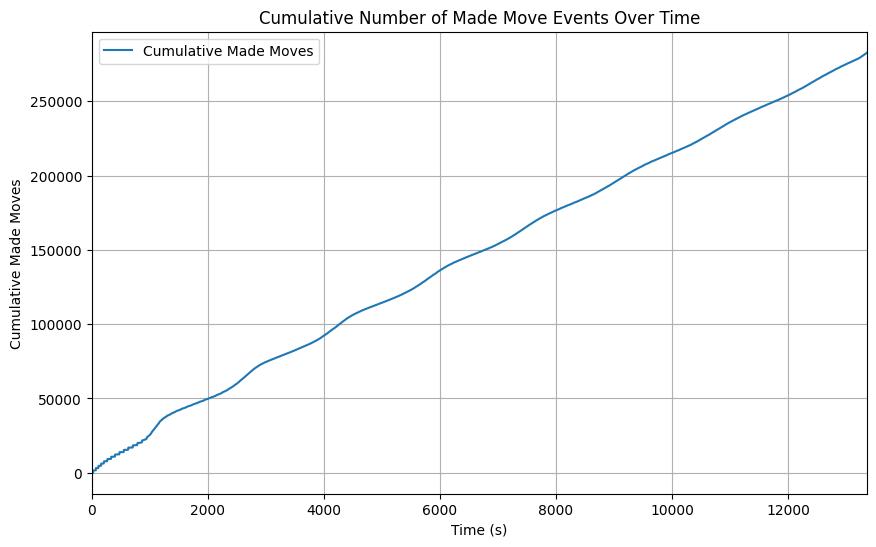

In [12]:
timestamps = [event[0] for event in events if event[1] == "made_move"]
cumulative_made_moves = list(range(1, len(timestamps) + 1))

plt.figure(figsize=(10, 6))
plt.plot(timestamps, cumulative_made_moves, label='Cumulative Made Moves')
plt.xlabel('Time (s)')
plt.ylabel('Cumulative Made Moves')
plt.title('Cumulative Number of Made Move Events Over Time')
plt.legend()
plt.grid(True)
plt.xlim(left=0, right=max(e[0] for e in events))
plt.show()

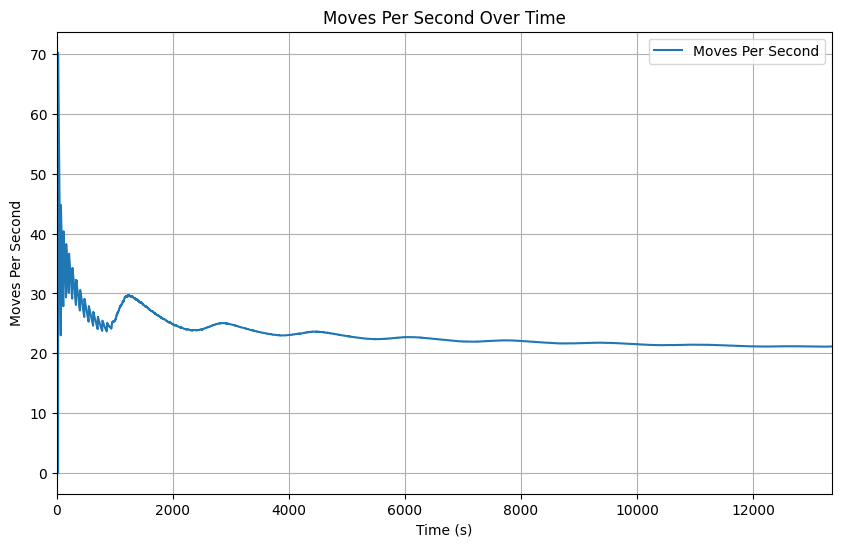

22.666900150852346


In [22]:
moves_per_second = []

moves_made = 0
for event in events:
    if event[1] != "made_move":
        continue
    moves_made += 1

    moves_per_second.append(moves_made / event[0])

plt.figure(figsize=(10, 6))
plt.plot([event[0] for event in events if event[1] == "made_move"], moves_per_second, label='Moves Per Second')
plt.xlabel('Time (s)')
plt.ylabel('Moves Per Second')
plt.title('Moves Per Second Over Time')
plt.legend()
plt.grid(True)
plt.xlim(left=0, right=max(e[0] for e in events))
plt.show()

final_moves_per_sec = max(2[len(moves_per_second) // 2:])
print(final_moves_per_sec)

In [23]:
total_duration = 0
total_evaluated = 0
for event in events:
    if event[1] == "gpu_evaluation":
        total_duration += event[2]["duration"]
        total_evaluated += event[2]["batch_size"]

# GPU bottleneck. Closer to 1 means that the GPU is the bottleneck because the
# moves per second we actually got is close to the theoretical maximum based on
# GPU evaluation speed.
# 
# This won't work when using caching.
print(final_moves_per_sec / ((total_evaluated / total_duration) / 500))

1.7070479690748934


In [24]:
# What percent of time is the GPU thread being used?

evaluations = [event[0] for event in events if event[1] == "gpu_evaluation"]
total_duration / (max(evaluations) - min(evaluations))

0.9223107155200869

In [25]:
# What is the average batch size?

batch_sizes = [event[2]["batch_size"] for event in events if event[1] == "gpu_evaluation"]
sum(batch_sizes) / len(batch_sizes)

99.31649377530395

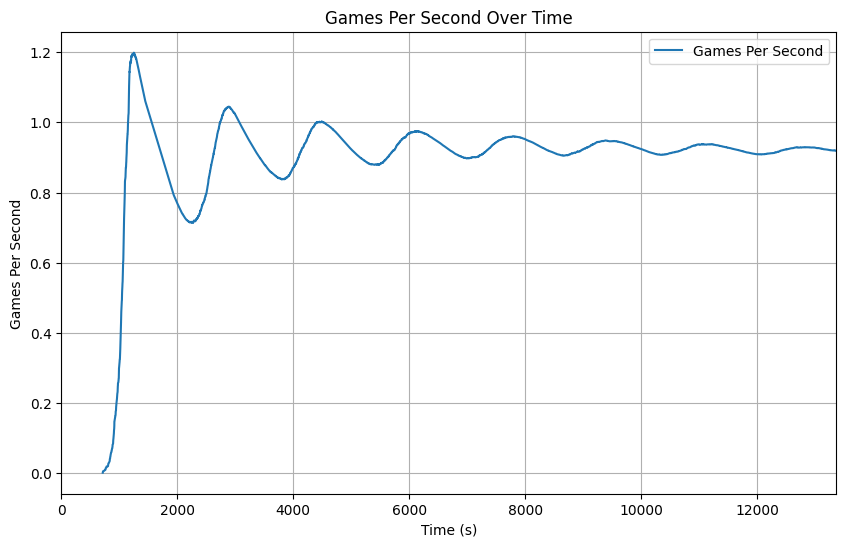

In [26]:
games_per_second = []

games_finished = 0
for event in events:
    if event[1] != "game_end":
        continue
    games_finished += 1

    games_per_second.append(games_finished / event[0])

plt.figure(figsize=(10, 6))
plt.plot([event[0] for event in events if event[1] == "game_end"], games_per_second, label='Games Per Second')
plt.xlabel('Time (s)')
plt.ylabel('Games Per Second')
plt.title('Games Per Second Over Time')
plt.legend()
plt.grid(True)
plt.xlim(left=0, right=max(e[0] for e in events))
plt.show()

In [30]:
games_per_second[-1]

0.9195853698227276